## Spacings 
Given the order statistics $X_{(1)}\leq ... \leq X_{(n)}$, define $(n-1)$ spacings (first order spacings) by 
$$D_k = X_{(k+1)}-X_{(k)}, k=1,...,n-1$$
Intuitively, the spacings should carry some information about the pdf $f$. 

Note that if $\tau \approx \frac{k+1}{n}\approx \frac{k}{n}$ then $X_{(k+1)}$ and $X_{(k)}$ estimate $F^{-1}(\tau)$.  
If $f(F^{-1}(\tau))$ is large then $D_k$ is small, conversely, $f(F^{-1}(\tau))$ is small then $D_k$ is large. 

#### Exponential Spacings 
$X_1,...,X_n\sim Exp(\lambda)$ iid. 
$$f(x;\lambda) = \lambda \exp(-\lambda x)\mathbb I(x\geq 0)$$
Given the order statistics $X_{(1)}\leq ...\leq X_{(n)}$ define 
\begin{align*}
Y_1 &= nX_{(1)}\\
Y_2 &= (n-1)(X_{(2)}-X_{(1)}) = (n-1)D_1\\
Y_2 &= (n-2)(X_{(3)}-X_{(2)}) = (n-2)D_2\\
\vdots\\
Y_n &= X_{(n)} - X_{(n-1)} = D_{n-1}
\end{align*}

__Proposition__ $Y_1,...,Y_n$ are iid $\sim Exp(\lambda)$  

_proof_. Note that the join pdf of $(X_{(1)}, ..., X_{(n)})$ if 
$$f(x_1,...,x_n) = n!\lambda^n\exp(-\lambda \sum^n x_i)\mathbb I(0\leq x_1<x_2<...<x_n)$$
Also, note that 
\begin{align*}
X_{(1)} &= Y_1/n \\
X_{(k)} &= \frac{Y_1}{n} + ... + \frac{Y_k}{n-k+1}, k = 2,...,n
\end{align*}
Therefore, 
$$g(y_1,...,y_n) = f\big(\frac{y_1}n, ..., \frac{y_1}{n} + \frac{y_2}{n-1} + ... + y_n\big)|J(y_1,...,y_n)|$$
Note that $|J|$ is the absolute determinant of the matrix 
$$\begin{bmatrix}
1/n&0&0&...&0\\
1/n&\frac 1{n-1}&0&...&0\\
\vdots &\vdots &\ddots &...&\vdots\\
1/n&\frac{1}{n-1}&\frac 1{n-2}&...&1
\end{bmatrix}$$
which is $\frac{1}{n!}$
$$g(y_1,...,y_n)=n!\lambda^n\exp(-\lambda \sum^n x_i) \frac 1{n!} = \lambda^n\exp(-\lambda \sum^n x_i)\mathbb I(y_1,...,y_n\geq 0)$$

__Proposition__ If $\frac{k_n}n\rightarrow\tau\in (0,1)$ and $f(F^{-1}(\tau)) > 0$, then 
$$nD_{k_n}\rightarrow^d Exp(f(F^{-1}(\tau)))$$
i.e. 
$$P(D_{k_n}\leq x )\approx 1 - \exp(-nf(F^{-1}(\tau))x), x\geq 0$$

_proof_. Note that 
$$X_{(k_n+1)}=^d F^{-1}\big(\frac{E_1+...+E_{k_n+1}}{E_1+...+E_{n+1}}\big), X_{(k_n)}=^d F^{-1}\big(\frac{E_1+...+E_{k_n}}{E_1+...+E_{n+1}}\big)$$
where $E_i \sim Exp(1)$  
so that 
\begin{align*}
nD_{k_n} &= ^d n\bigg(F^{-1}\big(\frac{E_1+...+E_{k_n+1}}{E_1+...+E_{n+1}} - F^{-1}\big(\frac{E_1+...+E_{k_n}}{E_1+...+E_{n+1}}\big)\big)\bigg)\\
&\approx \frac{1}{f(F^{-1}(\tau))}\bigg(\frac{nE_{k_n+1}}{E_1+...+E_{n+1}}\bigg)\\
&= \frac{1}{f(F^{-1}(\tau))}\bigg(\frac{E_{k_n+1}}{(E_1+...+E_{n+1})/n}\bigg)\\
&\rightarrow^p \frac{E_{k_n+1}}{f(F^{-1}(\tau))} &\text{WLLN, }\frac{E_1+...+E_{n+1}}n\rightarrow^p 1\\
&\sim Exp(f(F^{-1}(\tau)))
\end{align*}

### Example: density estimation using spacings
Consider $D_1,...,D_{n-1}$ are iid. exponential with $E(nD_k) = \exp(g(V_k))$ where $V_k = \frac{X_{(k+1)} + X_{(k)}}{2}$, then $V_k\approx F^{-1}(\tau), \tau\approx \frac kn\approx \frac{k+1}n$ and the density is $f(x)=\exp(-g(x))$

Using $B-spline$ functions, we can estimate the function $g(x)$
$$g(x)=\beta_0 + \sum_{i=1}^p \beta_j \psi_j(x)$$
where $\beta_i$'s are unknown parameters and $\psi_j$'s are B-spline functions. 

In [2]:
# create the splines functions
den.splines <- function(x,p=5) {
    library(splines)
    n <- length(x)
    x <- sort(x)
    x1 <- c(NA,x)
    x2 <- c(x,NA)
    sp <- (x2-x1)[2:n]
    mid <- 0.5*(x1+x2)[2:n]
    y <- n*sp
    xx <- bs(mid,df=p)
    r <- glm(y~xx,family=quasi(link="log",variance="mu^2"))
    density <- exp(-r$linear.predictors)
    r <- list(x=mid,density=density)
    r
}

Consider sampling from GMM model
$$0.7N(2,1) + 0.3N(-2, 1)$$

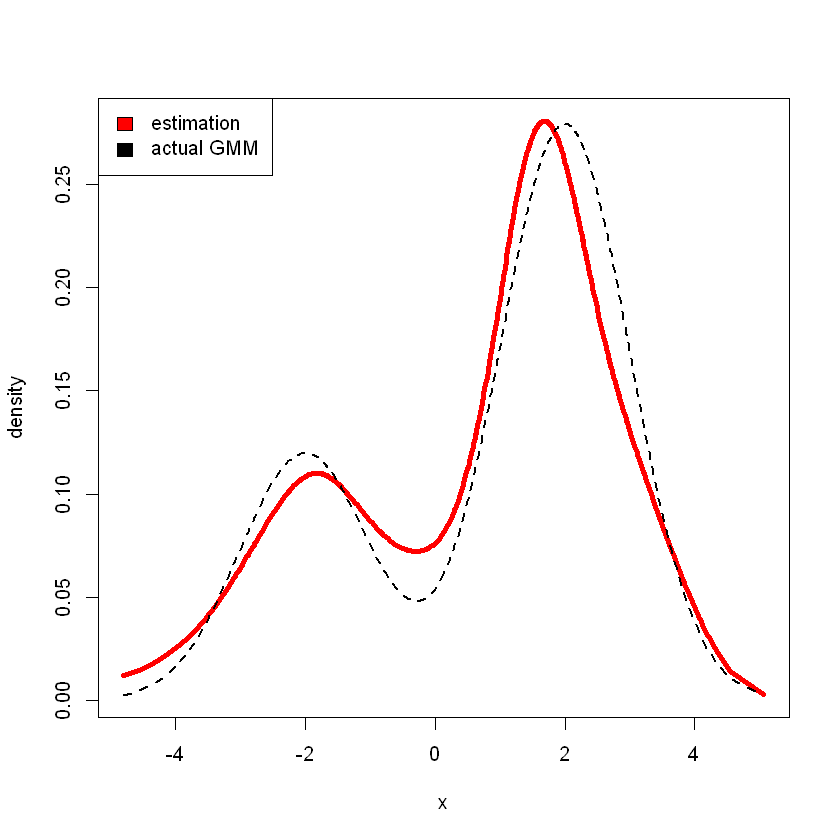

In [12]:
# randomly sample 500 points from given GMM
x <- ifelse(runif(500) < .7, rnorm(500, 2, 1), rnorm(500, -2, 1))
# estimate density using p = 8
r <- den.splines(x,p=8)
# estimation
plot(r$x,r$density,type="l",xlab="x",ylab="density",lwd=4,col="red")
# actual
lines(r$x,0.3*dnorm(r$x,-2,1)+0.7*dnorm(r$x,2,1),lwd=2,lty=2)
legend("topleft", c("estimation", "actual GMM"), fill=c("red", "black"))

## Hazard Functions
For $X$ is a positive continuous rv, its hazard function is 
$$h(x) = \frac{f(x)}{1-F(x)}$$

The motivation behind is to consider $X$ as the survival time, consider 
\begin{align*}
\delta^{-1}P(x<X<x+\delta\mid X>x) &= \delta^{-1}\frac{P(x<X\leq x+\delta)}{P(X>x)}\\
&= \delta^{-1}\frac{F(x+\delta) - F(x)}{1-F(x)}\\
&\rightarrow_{\delta\rightarrow 0} \frac{f(x)}{1-F(x)} =:h(x)
\end{align*}
Therefore, this represents instantaneous death rate given survival to time $x$. 

Also, note that 
$$h(x) = \frac{f(x)}{1-F(x)} = -\frac{d}{dx}\ln(1-F(x))$$
Therefore, 
$$F(x) = 1 - \exp(-\int_0^x h(t)dt), f(x) = h(x)\exp(-\int_0^x h(t)dt)$$

In this case, we require $\int_0^\infty h(x)dx = \infty$ so that to have a "proper" probability distribution. 

The shape of the hazard function gives info not immediately apparent in $f$ or $F$. 
$h(x)$ increasing indicates new better than used, decreasing indicates used better than new